# **Create visualizations using Matplotib, Seaborn and Folium** 

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Importing Data

In [3]:
URL = ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')
df.head()

Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis


### TUGAS 1.1: Kembangkan *Line chart* menggunakan fungsi pandas untuk menunjukkan bagaimana penjualan mobil berfluktuasi dari tahun ke tahun


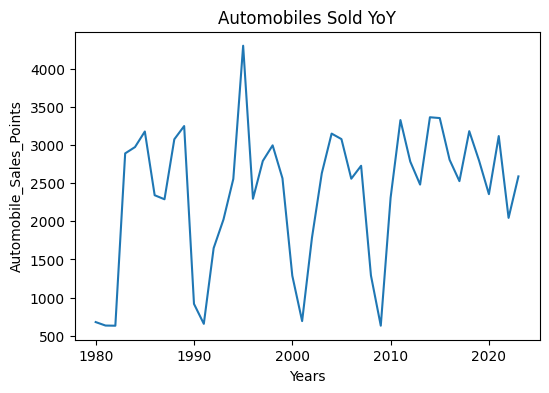

In [6]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(6, 4))
df_line.plot(x='Years', y='Automobiles_Sales', kind = 'line')
plt.xlabel('Years')
plt.ylabel('Automobile_Sales_Points')
plt.title('Automobiles Sold YoY')
plt.show()

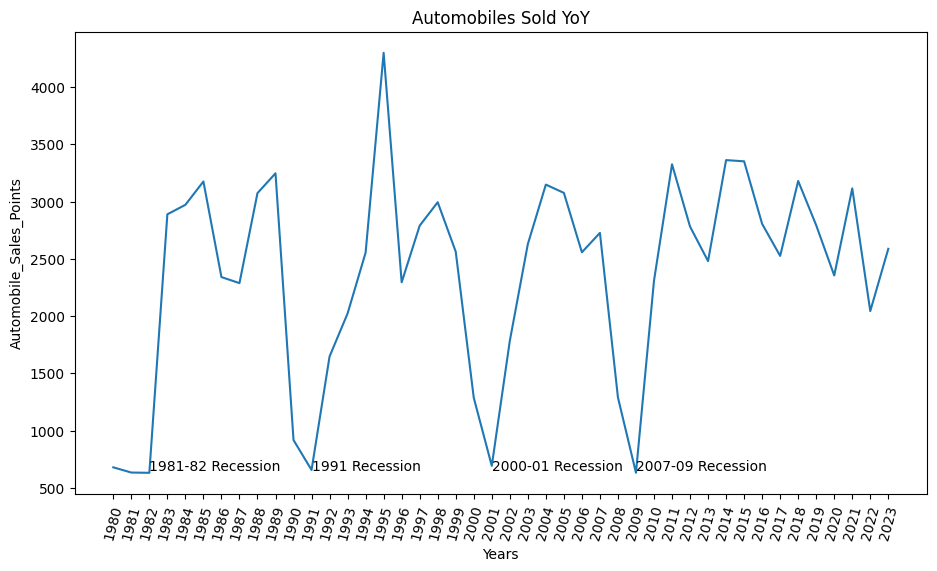

In [7]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(11, 6))
df_line.plot( kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991, 650, '1991 Recession')
plt.text(2001, 650, '2000-01 Recession')
plt.text(2009, 650, '2007-09 Recession')
plt.xlabel('Years')
plt.ylabel('Automobile_Sales_Points')
plt.title('Automobiles Sold YoY')
plt.show()

#### TUGAS 1.2: Plot garis yang berbeda untuk kategori jenis kendaraan dan analisis tren untuk menjawab pertanyaan: Apakah ada perbedaan yang mencolok dalam tren penjualan antara berbagai jenis kendaraan selama periode resesi?

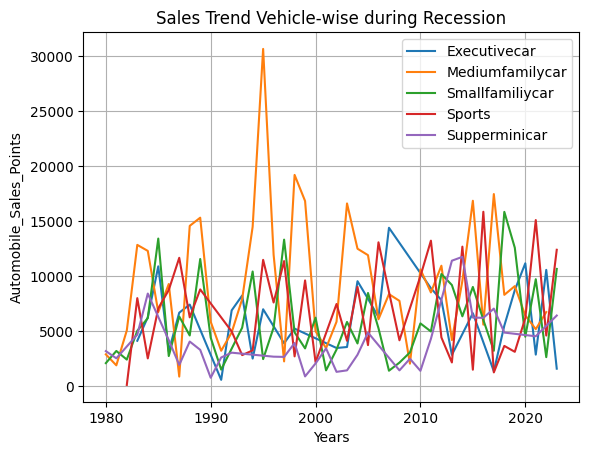

In [8]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(x='Years', y='Automobiles_Sales', kind = 'line')
plt.xlabel('Years')
plt.ylabel('Automobile_Sales_Points')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.grid()
plt.show()

Generally, sales volumes tend to decrease during recession periods. However, some vehicle types experience more significant declines than others. For example, the sales of superminicars drop sharply but increase in the following years, while the sales of medium family cars, which do not fall as much, remain relatively stable in the subsequent years. It is quite challenging to precisely explain the differences between these vehicle types.

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


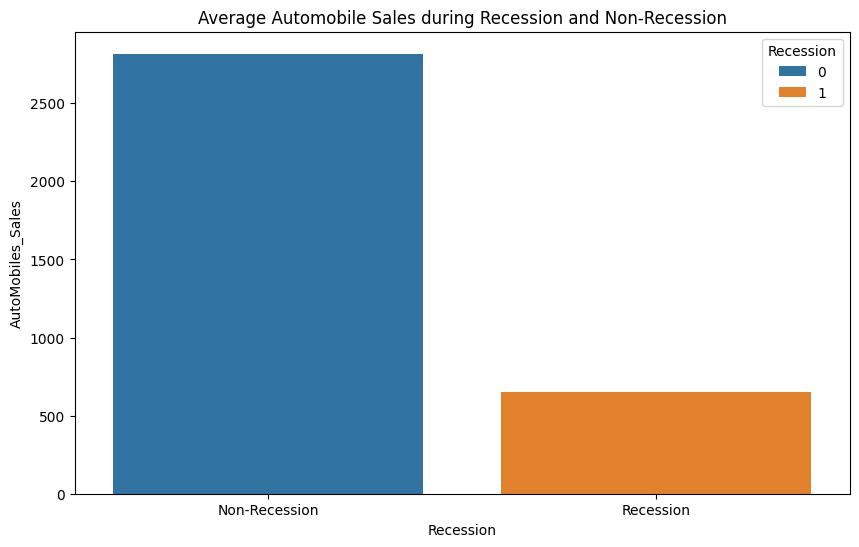

In [9]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('AutoMobiles_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

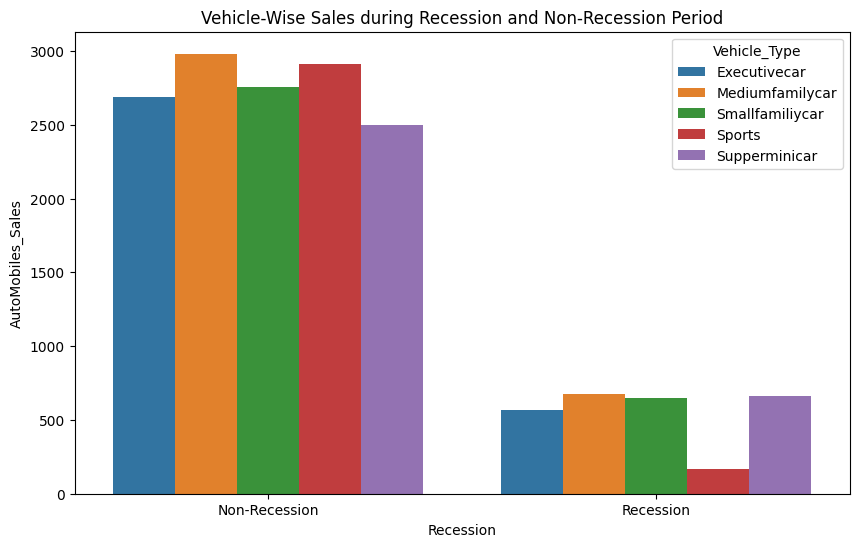

In [10]:
recession_data = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('AutoMobiles_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

Text(0.5, 1.0, 'Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

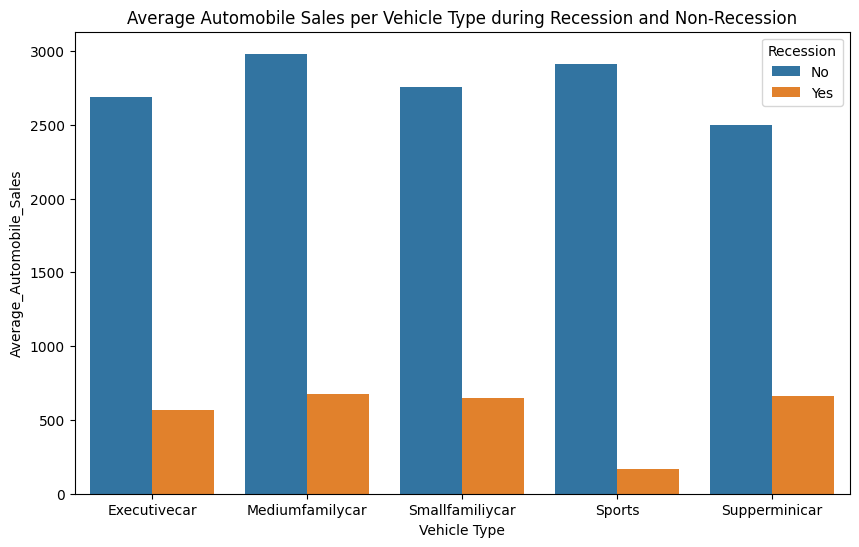

In [13]:
barc=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
barc["Recession"] = barc["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=barc, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('Vehicle Type')
plt.ylabel('Average_Automobile_Sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

After conducting an in-depth analysis, it was found that during non-recession years, almost all types of car sales were above the high range of 2500. However, after the impact of the recession, the sales type that dropped the most was sports cars. This is likely because, during that time, people were saving money and avoiding purchasing cars, especially sports cars, which are likely to be quite expensive when their economic situation worsens.

### TASK 1.4: Gunakan sub-plotting untuk membandingkan variasi GDP selama periode resesi dan non-resesi dengan membuat plot garis untuk setiap periode.

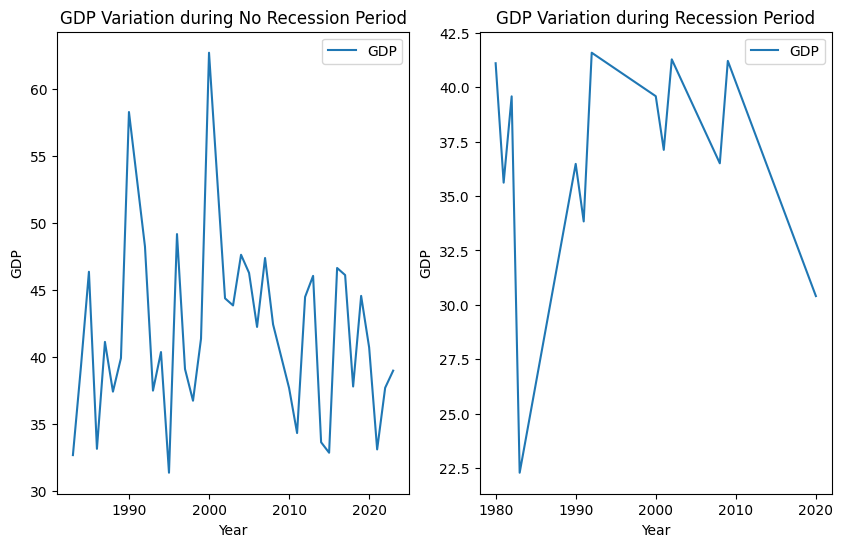

In [16]:
recc = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = recc[recc["Recession"] == 0]
yes = recc[recc["Recession"] == 1]

fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')

yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')

plt.show()

### Task 1.5: Buat plot Bubble untuk menampilkan dampak musiman terhadap Penjualan Mobil.

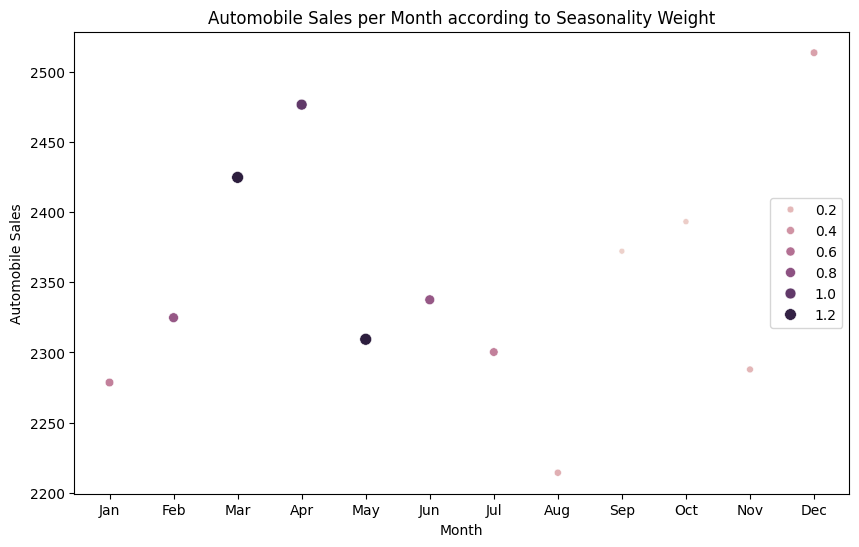

In [20]:
temp = df.copy()
months=temp["Month"].unique().tolist()
# display(months)
temp["Month"] = temp["Month"].replace(dict(zip(months, range(0,len(months)))))
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()
# display(temp)
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0,len(months)),labels=months)
sns.scatterplot(data=temp,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",  # pass in weights 
                #sizes=(20, 1500)
               )
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.legend(loc="right")

### Task 1.6: Gunakan fungsi Matplotlib untuk membuat scatter plot guna mengidentifikasi korelasi antara harga rata-rata kendaraan dengan volume penjualan selama periode resesi.
#### Dari data tersebut, buat scatter plot untuk mengidentifikasi apakah ada korelasi antara kepercayaan konsumen dan penjualan mobil selama periode resesi?

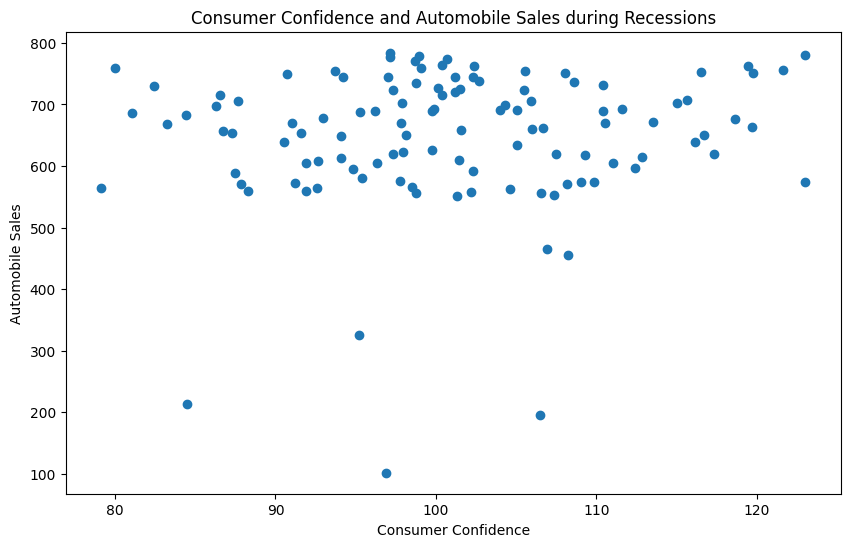

In [23]:
 #Create dataframes for recession and non-recession period
plt.figure(figsize=(10, 6))
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

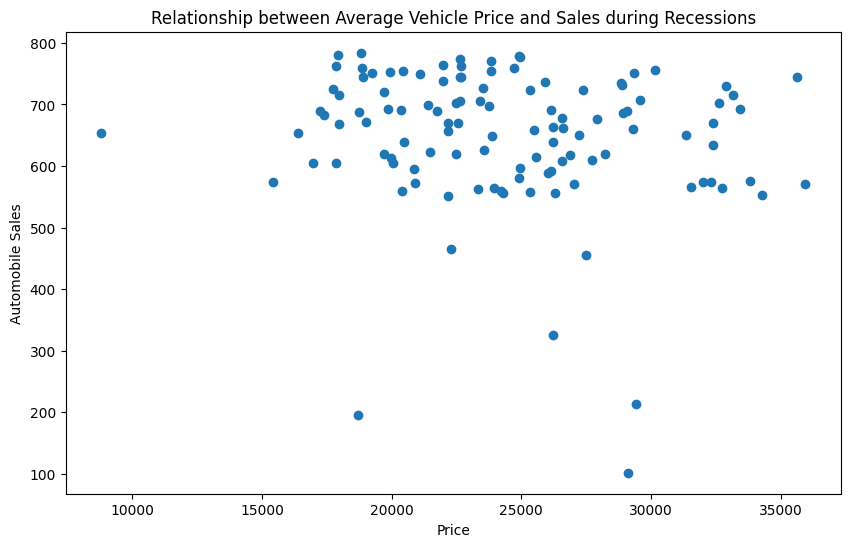

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

### Task 1.7: Buat pie chart untuk menampilkan porsi pengeluaran iklan XYZ Automotives selama periode resesi dan non-resesi.

In [27]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


No Recession    0.790129
Recession       0.209871
Name: Advertising_Expenditure, dtype: float64

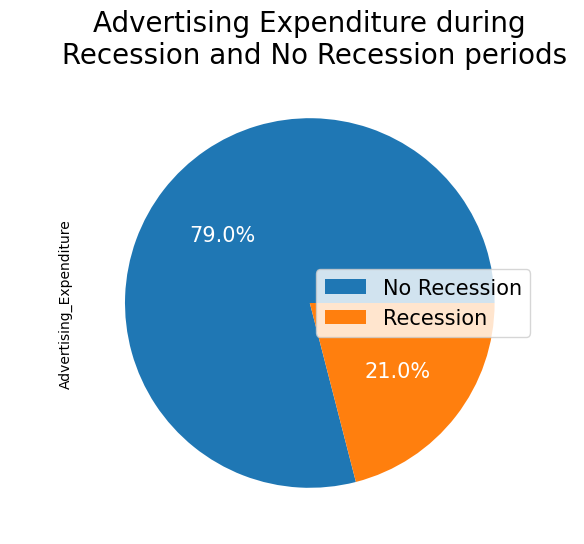

In [55]:
temp=df.groupby("Recession")["Advertising_Expenditure"].sum()/df["Advertising_Expenditure"].sum()
temp.index=["No Recession", "Recession"]
display(temp)
temp.plot(kind="pie", figsize=(10, 6), y="Advertising_Expenditure", x="Recession",
          autopct='%1.1f%%',
          textprops={'color':"w", "size":15})
plt.title(label="Advertising Expenditure during\n Recession and No Recession periods",fontsize=20)
plt.legend(fontsize=15)
plt.show()

Based on the analysis results, it was found that the company spends more on advertising activities during non-recession periods compared to recession periods in order to attract more consumers. During recessions, the company reduces advertising expenses due to the economic uncertainty that accompanies a recession. To save costs, the company cuts down on its advertising budget.

### TUGAS 1.8: Buat diagram pie untuk menampilkan total pengeluaran iklan untuk setiap jenis kendaraan selama periode resesi.
<br>
Bisakah kita mengamati bagian dari setiap jenis kendaraan dalam total pengeluaran selama periode resesi?

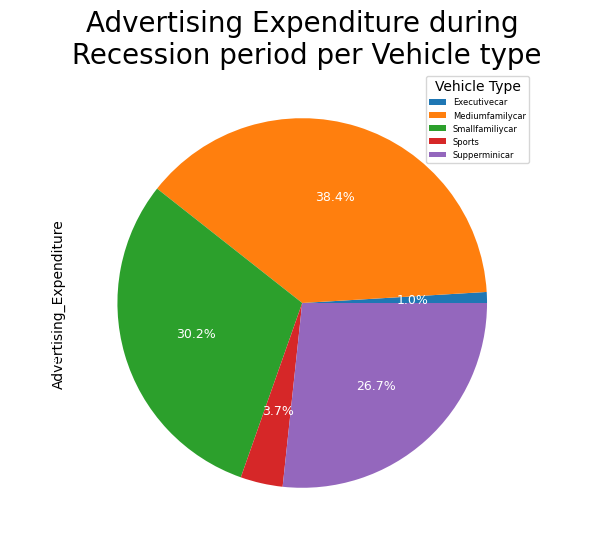

In [81]:
temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(10, 6),
          autopct='%1.1f%%',
          textprops={'color':"w", "size":9},
         )
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=20)
plt.legend(title="Vehicle Type", loc="best", fontsize=6)
plt.show()

### Task 1.9: Buat sebuah lineplot untuk menganalisis efek tingkat pengangguran terhadap jenis kendaraan dan penjualan selama periode resesi.
<br>Analisis efek tingkat pengangguran terhadap jenis kendaraan dan penjualan selama periode resesi
#### Anda dapat membuat sebuah lineplot dan memberikan judul pada plot tersebut sebagai 'Efek Tingkat Pengangguran terhadap Jenis Kendaraan dan Penjualan'

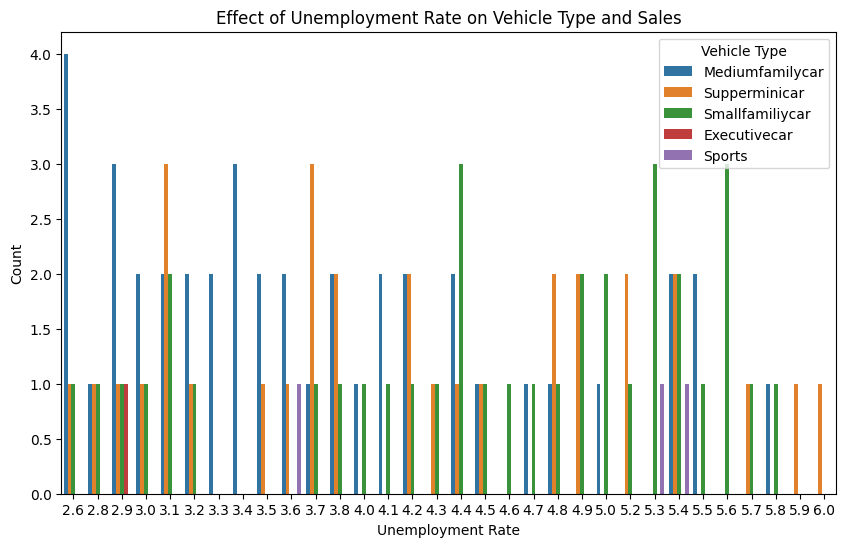

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Recession"]==1], x="unemployment_rate", hue="Vehicle_Type")
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc="upper right", title="Vehicle Type")

During recession periods, superminicar sales tend to be higher when the unemployment rate is low. On the other hand, smallfamilycar shows the opposite behavior, being more stable and sideways. Mediumminicar also tends to have higher sales volumes when the unemployment rate is low because when the unemployment rate is low, people are more able to purchase cars due to fewer economic problems.

### OPSIONAL: Task 1.10 Buatlah peta yang menunjukkan wilayah/kantor dengan penjualan tertinggi dari perusahaan selama periode resesi

In [83]:
import folium

us_geo = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"

temp=df[df["Recession"]==1]

us_map = folium.Map(location=[40.60987815505275, -100.77676139515009], zoom_start=4)

folium.Choropleth(
    geo_data=us_geo,
    data=temp,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(us_map)

us_map